An imbalanced dataset is one in which the distribution of classes is not equal. This is a common problem in classification tasks, where one class may be significantly underrepresented compared to others. This imbalance can lead to poor performance of machine learning models, especially if the model simply predicts the majority class.

### Understanding Imbalanced Datasets

In a binary classification problem, if 90% of the samples belong to class 0 and only 10% belong to class 1, the dataset is imbalanced. A model trained on this data may simply predict class 0 for all samples and achieve high accuracy, but it would perform poorly in identifying the minority class.

### Techniques to Handle Imbalanced Datasets

There are several techniques to handle imbalanced datasets, including:

1. **Resampling the Dataset**:
   - **Oversampling the Minority Class**: Increasing the number of samples in the minority class.
   - **Undersampling the Majority Class**: Decreasing the number of samples in the majority class.
   
2. **Synthetic Data Generation**:
   - **SMOTE (Synthetic Minority Over-sampling Technique)**: Generating synthetic samples for the minority class.
   
3. **Algorithmic Approaches**:
   - Using algorithms that are designed to handle imbalanced data.
   
4. **Evaluation Metrics**:
   - Using appropriate evaluation metrics that consider the imbalance, such as precision, recall, F1-score, ROC-AUC, etc.

### Example Code: Handling Imbalanced Data

Let's demonstrate these techniques using a synthetic dataset.

#### 1. Generating an Imbalanced Dataset

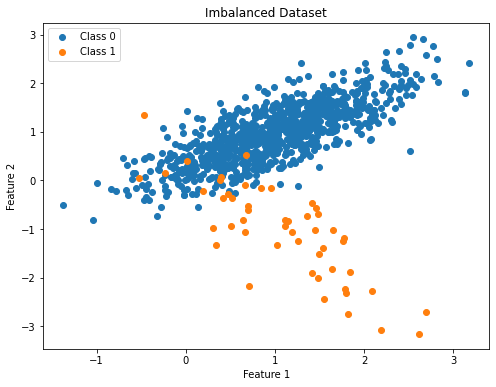

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Generating a synthetic imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, 
                           n_redundant=0, n_clusters_per_class=1, weights=[0.95], 
                           flip_y=0, random_state=1)

# Creating a DataFrame for visualization
df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
df['Target'] = y

# Plotting the dataset
plt.figure(figsize=(8, 6))
plt.scatter(df[df['Target'] == 0]['Feature 1'], df[df['Target'] == 0]['Feature 2'], label='Class 0')
plt.scatter(df[df['Target'] == 1]['Feature 1'], df[df['Target'] == 1]['Feature 2'], label='Class 1')
plt.title('Imbalanced Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

#### 2. Handling Imbalance with Resampling

##### Oversampling the Minority Class

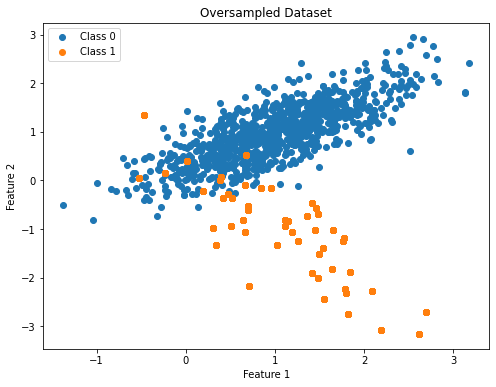

In [2]:
from imblearn.over_sampling import RandomOverSampler

# Applying Random Oversampling
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Visualizing the resampled dataset
df_resampled = pd.DataFrame(X_resampled, columns=['Feature 1', 'Feature 2'])
df_resampled['Target'] = y_resampled

plt.figure(figsize=(8, 6))
plt.scatter(df_resampled[df_resampled['Target'] == 0]['Feature 1'], df_resampled[df_resampled['Target'] == 0]['Feature 2'], label='Class 0')
plt.scatter(df_resampled[df_resampled['Target'] == 1]['Feature 1'], df_resampled[df_resampled['Target'] == 1]['Feature 2'], label='Class 1')
plt.title('Oversampled Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

##### Undersampling the Majority Class

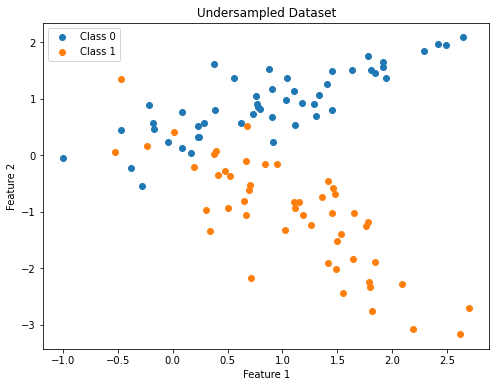

In [3]:
from imblearn.under_sampling import RandomUnderSampler

# Applying Random Undersampling
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Visualizing the resampled dataset
df_resampled = pd.DataFrame(X_resampled, columns=['Feature 1', 'Feature 2'])
df_resampled['Target'] = y_resampled

plt.figure(figsize=(8, 6))
plt.scatter(df_resampled[df_resampled['Target'] == 0]['Feature 1'], df_resampled[df_resampled['Target'] == 0]['Feature 2'], label='Class 0')
plt.scatter(df_resampled[df_resampled['Target'] == 1]['Feature 1'], df_resampled[df_resampled['Target'] == 1]['Feature 2'], label='Class 1')
plt.title('Undersampled Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

### SMOTE (Synthetic Minority Over-sampling Technique)

**SMOTE (Synthetic Minority Over-sampling Technique)** is a popular method for addressing the class imbalance problem in machine learning. Instead of simply duplicating minority class instances (as in traditional oversampling), SMOTE creates synthetic instances by interpolating between existing minority class instances. This helps to create a more balanced and diverse dataset, potentially leading to better model performance.

### How SMOTE Works

1. **Choose a Minority Class Instance**: For each instance \( x \) in the minority class, find its k-nearest minority class neighbors.
2. **Randomly Select a Neighbor**: Randomly select one of the k-nearest neighbors, denoted as \( x_{\text{neighbor}} \).
3. **Create Synthetic Instance**: Generate a new synthetic instance by interpolating between \( x \) and \( x_{\text{neighbor}} \) using the formula:
   \[
   x_{\text{new}} = x + \delta \cdot (x_{\text{neighbor}} - x)
   \]
   where \( \delta \) is a random number between 0 and 1.

By applying the above steps repeatedly, SMOTE generates synthetic instances that increase the size of the minority class, thus balancing the dataset.

### Implementing SMOTE with `imblearn`

While the original question asked for implementation using only `scikit-learn`, SMOTE is specifically available through the `imblearn` library. Here’s how to use it:

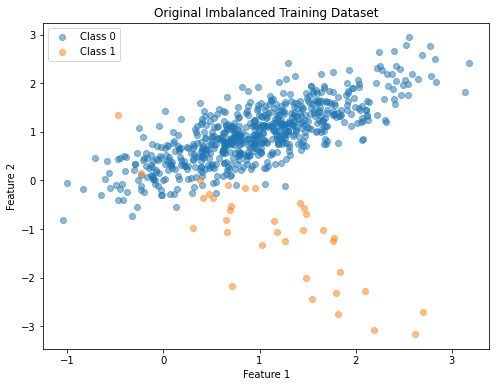

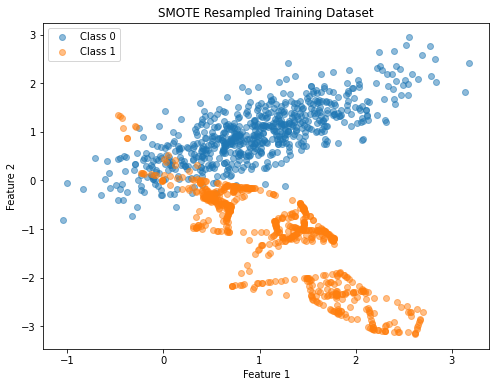

Classification report for the SMOTE resampled dataset:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       285
           1       0.58      0.73      0.65        15

    accuracy                           0.96       300
   macro avg       0.78      0.85      0.81       300
weighted avg       0.97      0.96      0.96       300



In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Generating a synthetic imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, 
                           n_redundant=0, n_clusters_per_class=1, weights=[0.95], 
                           flip_y=0, random_state=1)

# Splitting the original data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Applying SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Visualizing the original and SMOTE datasets
def plot_datasets(X, y, title):
    df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
    df['Target'] = y
    plt.figure(figsize=(8, 6))
    plt.scatter(df[df['Target'] == 0]['Feature 1'], df[df['Target'] == 0]['Feature 2'], label='Class 0', alpha=0.5)
    plt.scatter(df[df['Target'] == 1]['Feature 1'], df[df['Target'] == 1]['Feature 2'], label='Class 1', alpha=0.5)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

plot_datasets(X_train, y_train, 'Original Imbalanced Training Dataset')
plot_datasets(X_train_smote, y_train_smote, 'SMOTE Resampled Training Dataset')

# Training a Random Forest classifier on the SMOTE dataset
clf_smote = RandomForestClassifier(random_state=42)
clf_smote.fit(X_train_smote, y_train_smote)

# Making predictions
y_pred_smote = clf_smote.predict(X_test)

# Evaluating the model
print("Classification report for the SMOTE resampled dataset:")
print(classification_report(y_test, y_pred_smote))

### Explanation of the Code

1. **Generating Data**: We generate a synthetic imbalanced dataset with a majority and minority class.
2. **Splitting Data**: The data is split into training and testing sets.
3. **Applying SMOTE**: We apply the SMOTE technique to the training data using `SMOTE` from the `imblearn` library. This generates synthetic instances of the minority class.
4. **Visualization**: The original imbalanced dataset and the SMOTE-resampled dataset are visualized to show the effect of SMOTE.
5. **Training and Evaluation**: A `RandomForestClassifier` is trained on the SMOTE-resampled dataset, and the model is evaluated on the test set. The classification report is printed to show the performance metrics.

### Advantages of SMOTE

- **Balanced Dataset**: SMOTE helps in balancing the class distribution, leading to better model performance.
- **Diverse Instances**: It generates diverse synthetic instances, unlike traditional oversampling which merely duplicates existing instances.
- **Better Generalization**: Models trained on SMOTE data are likely to generalize better on unseen data due to the diverse synthetic instances.

### Disadvantages of SMOTE

- **Computational Overhead**: Generating synthetic instances can be computationally expensive, especially for large datasets.
- **Risk of Overfitting**: SMOTE might introduce noise if not used carefully, leading to overfitting.
- **Boundary Issues**: It may create instances that are on the class boundaries, potentially leading to less distinct class separation.

By using SMOTE, you can effectively handle imbalanced datasets, improve your model's performance, and achieve better generalization on real-world data.

#### 3. Algorithmic Approaches

Certain algorithms handle imbalanced data better. For example, decision trees, random forests, and gradient boosting can be more resilient to imbalance. Additionally, some algorithms offer built-in methods to handle class imbalance.

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Training a Random Forest classifier
clf = RandomForestClassifier(class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)

# Making predictions
y_pred = clf.predict(X_test)

# Evaluating the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       285
           1       1.00      0.67      0.80        15

    accuracy                           0.98       300
   macro avg       0.99      0.83      0.90       300
weighted avg       0.98      0.98      0.98       300



#### 4. Evaluation Metrics

Use evaluation metrics that consider class imbalance, such as precision, recall, F1-score, and ROC-AUC, instead of accuracy alone.

In [7]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Calculating evaluation metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')
print(f'ROC-AUC: {roc_auc:.2f}')

Precision: 1.00
Recall: 0.67
F1-score: 0.80
ROC-AUC: 0.83


### Summary

Handling imbalanced datasets is crucial for building effective and reliable machine learning models. Techniques such as resampling, synthetic data generation, algorithmic approaches, and using appropriate evaluation metrics help to address the challenges posed by imbalanced data. By combining these methods, you can improve the performance of your models on imbalanced datasets.